# Business Context.

This analysis explores retail sales data to understand revenue and profit drivers across product categories, regions, and customer segments.

The goal is to answer business-relevant questions and translate findings into actionable recommendations.


In [ ]:
# Importing libraries and loading dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/superstore.csv", encoding="latin1")

## Basic statistics and info about the dataset.
df.head()

df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

np.int64(0)

# Dataset Overview.

The dataset contains **9,994 retail order records** with **21 features**, covering customer details, product information, sales performance, and logistics.

- **Rows:** 9,994  
- **Columns:** 21  
- **Memory usage:** ~1.6 MB  

# Feature Summary.

- **Numerical:** `Sales`, `Quantity`, `Discount`, `Profit`
- **Categorical:** Customer, product, geographic, and shipping attributes
- **Temporal:** `Order Date`, `Ship Date` (stored as objects, to be converted later)

# Data Quality.

- No missing values  
- No duplicate rows  
- Data types are appropriate for initial analysis  

dataset is clean.


In [5]:
# Fixing datatypes.

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# saving cleaned dataset.
df.to_csv("../data/processed/superstore_clean.csv", index=False)



# Sample Questions.

1. Which product categories and sub-categories generate the highest profit?
2. How do sales and profit vary across regions?
3. Which customer segments are most valuable?
4. How do discounts impact profitability?


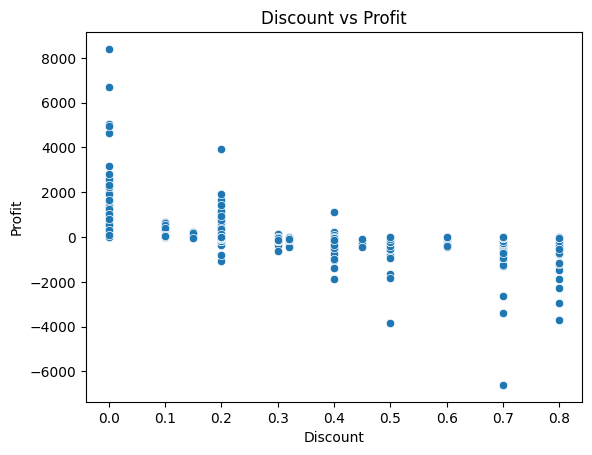

In [8]:
# KPI Grouped Analysis.


# sales & profit by category
df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Profit", ascending=False)

# regional performance
df.groupby("Region")[["Sales", "Profit"]].sum()

# segment analysis
df.groupby("Segment")[["Sales", "Profit"]].mean()

# Discount VS Profit
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()


# Key insights.

- Technology products generate the highest profit despite lower sales volume compared to Furniture.
  
- Certain regions show strong sales but weak profit margins, suggesting inefficient discounting strategies.
  
- Consumer segment contributes the highest overall revenue, while Corporate customers show higher average profit per order.
  
- Higher discounts are associated with reduced profitability, indicating diminishing returns.


# Recommendations.

- Reduce aggressive discounting on low-margin products.
  
- Focus marketing efforts on high-profit sub-categories within Technology.
  
- Investigate regional pricing strategies to improve profit margins.


# Reflection.

This project highlighted the importance of asking clear analytical questions before exploring data. With additional data such as customer lifetime value or operational costs, deeper insights could be developed.
